# Sampling Algorithms

## Generate Random Samples and Plotting

In [1]:
# In Python, the sampling package is under numpy called numpy.random
import numpy as np
# The plotting package is called matplotlib
import matplotlib.pyplot as plt

# We would need constant pi from math package
import math

Let's generate random samples following $U(0,1)$ and plot it's empirical distribution using histogram.

In [2]:
unif_samples = np.random.rand(100)

# Print the first 10 components, : is used for slicing in Python
print(unif_samples[:10])

[0.60052221 0.44447103 0.2437838  0.02274567 0.84427312 0.0314978
 0.63354144 0.36711456 0.85308513 0.27762641]


Text(0, 0.5, 'Frequency')

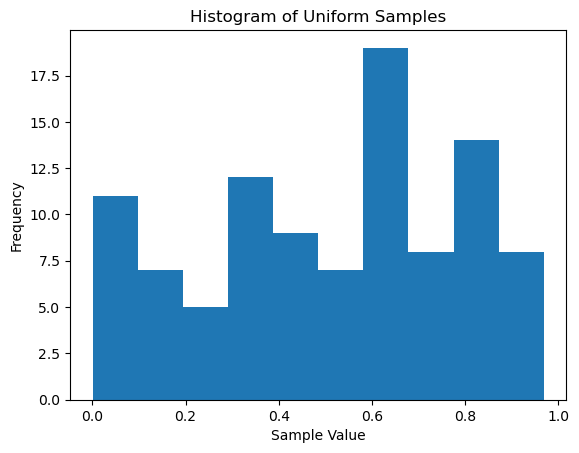

In [3]:
# Build the histogram
plt.hist(unif_samples)
# Change the title of the graph
plt.title('Histogram of Uniform Samples')
# Set name of axes
plt.xlabel('Sample Value')
plt.ylabel('Frequency')

Notice that the number of bins in the histogram is by default 10. However, we can set this by adding a parameter to the function.

(array([18., 17., 16., 27., 22.]),
 array([7.78023221e-04, 1.94321692e-01, 3.87865360e-01, 5.81409029e-01,
        7.74952697e-01, 9.68496365e-01]),
 <BarContainer object of 5 artists>)

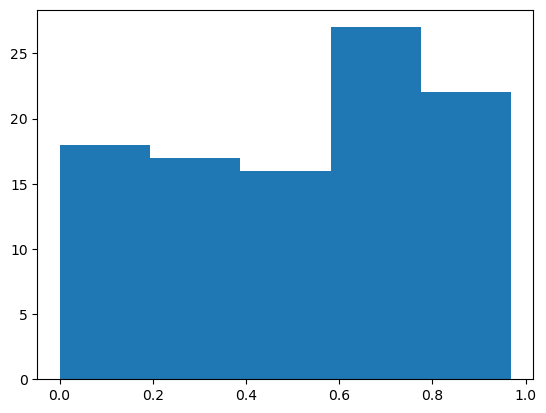

In [4]:
# Build the histogram with 5 bins
plt.hist(unif_samples, bins = 5)

(array([14.,  5., 15., 10., 13., 15., 17., 11.]),
 array([7.78023221e-04, 1.21742816e-01, 2.42707609e-01, 3.63672402e-01,
        4.84637194e-01, 6.05601987e-01, 7.26566780e-01, 8.47531573e-01,
        9.68496365e-01]),
 <BarContainer object of 8 artists>)

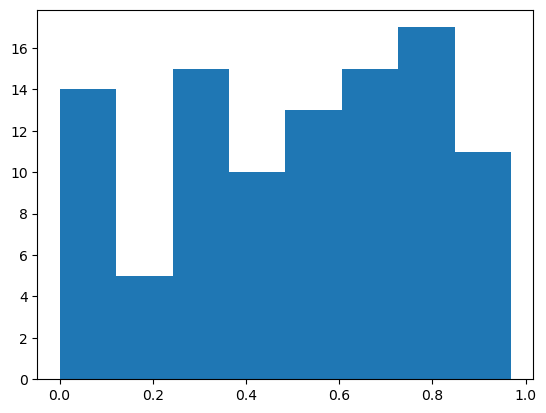

In [5]:
# Build the histogram, with the number of bins to be automatically determined
plt.hist(unif_samples, bins = 'auto')

Except the number of bins, we can also let the histogram be normalized such that it has the meaning of probability density or probability mass function.

(array([1.15736155, 0.41334341, 1.24003023, 0.82668682, 1.07469287,
        1.24003023, 1.4053676 , 0.9093555 ]),
 array([7.78023221e-04, 1.21742816e-01, 2.42707609e-01, 3.63672402e-01,
        4.84637194e-01, 6.05601987e-01, 7.26566780e-01, 8.47531573e-01,
        9.68496365e-01]),
 <BarContainer object of 8 artists>)

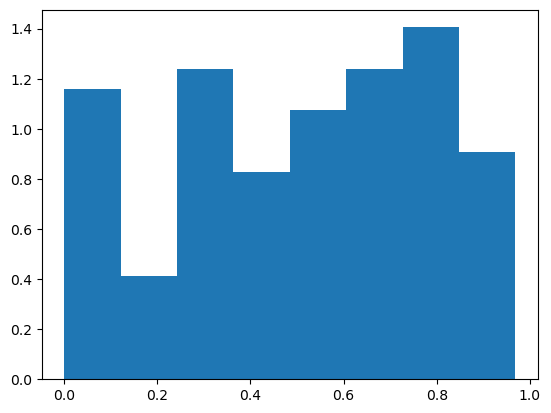

In [6]:
# Build the histogram, with the number of bins to be automatically determined and the frequency to be normalized
plt.hist(unif_samples, bins = 'auto', density = True)

Notice that there are 8 bins with each bin of length $\frac{1}{8}$, so the sum of heights of all rectangles in the histogram shall be $8$ such that $8\times \frac{1}{8} = 1$, a normalized density. In other words, when the density parameter is set as True, the area of the histogram adds up to 1.

(array([0.02999416, 0.17996495, 0.17996495, 0.43491529, 0.22495619,
        0.23995326, 0.11997663, 0.08998247]),
 array([-2.58456063, -1.91776412, -1.25096761, -0.58417109,  0.08262542,
         0.74942193,  1.41621845,  2.08301496,  2.74981148]),
 <BarContainer object of 8 artists>)

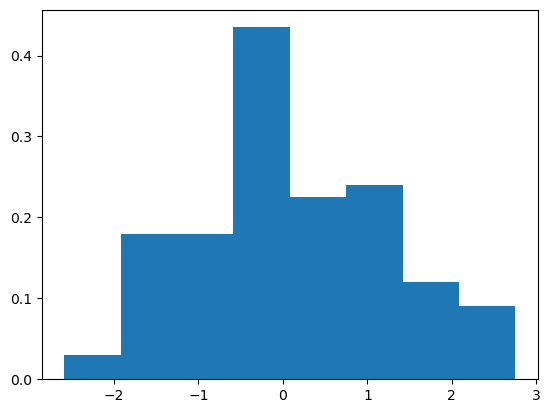

In [7]:
# Let's try the same thing for the normal distribution
normal_samples = np.random.randn(100)
plt.hist(normal_samples, bins = 'auto', density = True)

This histogram enables us to intuitively see the distribution of random samples.

## Inverse CDF Method

It's easy to prove that if we want to sample from a probability distribution with CDF $F$, then we can first sample $X\sim U(0,1)$ and $F^{-1}(X)\sim F$. This is the fundamental tool in sampling theory.

As an example, we consider the standard Cauchy distribution with density $f(x) = \frac{1}{\pi}\frac{1}{1+x^2},x\in\mathbb{R}$, it's obvious that the CDF is given by $F(x) = \frac{1}{\pi}\left(\arctan x + \frac{\pi}{2}\right)$ and the inverse of the CDF is given by $F^{-1}(x) = \tan\left[\pi\left(y-\frac{1}{2}\right)\right]$.

In [8]:
# The inverse CDF method of sampling from Cauchy distribution
def inv_CDF_Cauchy(size):
    # First sample independent U(0,1) random numbers
    unif_samples = np.random.rand(size)
    
    # Apply inverse CDF
    cauchy_samples = np.tan(math.pi * (unif_samples - 0.5))
    
    return cauchy_samples

(array([0.00278421, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00278421]),
 array([-108.16808513, -107.80891676, -107.44974839, ...,  495.95311537,
         496.31228374,  496.67145211]),
 <BarContainer object of 1684 artists>)

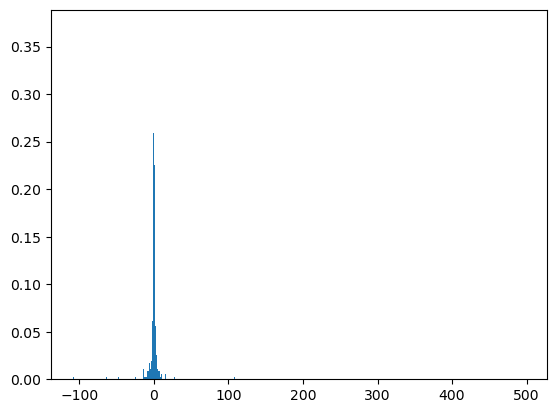

In [9]:
# Let's test our function with the histogram
cauchy_samples = inv_CDF_Cauchy(1000)
plt.hist(cauchy_samples, bins = 'auto', density = True)

It's a pity that the histogram is not providing us with useful information about the distribution (since Cauchy distribution has a heavy tail), so we have to refer to kernel density estimation for a smoother curve.

In [10]:
# Need the scipy package to plot the true density of Cauchy distribution
import scipy

# Need the sklearn package for KDE
import sklearn
from sklearn.neighbors import KernelDensity

In [11]:
# KDE estimation, but we have to input a 2-D array
# First reshape (-1 means that it's unknown and numpy will figure it out for us)
cauchy_samples = cauchy_samples.reshape(-1,1)
print(cauchy_samples.shape)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(cauchy_samples)

(1000, 1)


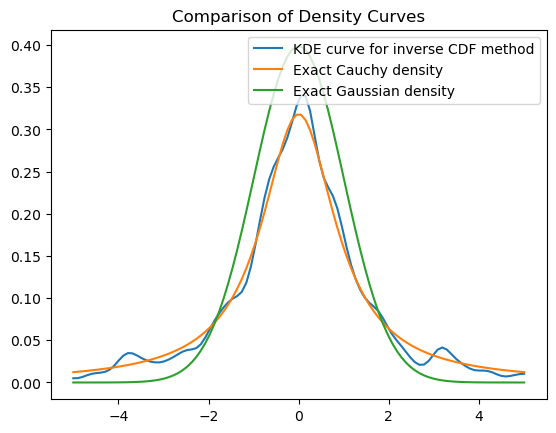

In [12]:
# Plot the KDE result
plot_x = np.linspace(-5,5,100) # x-axis in plotting
kde_input = plot_x.reshape(-1,1) # Don't forget to change dimension to 2
plot_x_log_likelihood = kde.score_samples(kde_input) # This is log-likelihood values (refer to document for details)
plot_x_likelihood = np.exp(plot_x_log_likelihood) # Exponentialize to get likelihood
plt.plot(plot_x,plot_x_likelihood) # Plot density curve
plt.title('Comparison of Density Curves')

# Plot the true standard Cauchy density in the same plot
plot_x_true_density = scipy.stats.cauchy.pdf(plot_x)
plt.plot(plot_x,plot_x_true_density)

# Plot the standard Gaussian density in the same plot to see the difference
plot_x_normal_density = scipy.stats.norm.pdf(plot_x)
plt.plot(plot_x,plot_x_normal_density)

# We can add legend to specify curves
plt.legend(['KDE curve for inverse CDF method','Exact Cauchy density','Exact Gaussian density'])

Our inverse CDF sampler is actually generating the standard Cauchy distributed random samples and the KDE curve is significantly different from the Gaussian density. It can be seen clearly that the Cauchy distribution has a much fatter tail than the Gaussian, which makes its mean to be infinite.

## Metropolis-Hastings Algorithm

Although the inverse CDF method is powerful, there exists some cases where it fails. Most frequently, it fails in the Bayesian setting when one wants to sample from the posterior. One might be confused why it fails, since knowing the CDF enables us to compute its inverse function.

The possible difficulties are the following:

(a): CDF does not necessarily have a closed-form inverse

(b): CDF itself does not necessarily have a closed-form formula

(c): CDF even PDF may be partially unknown

It's clear that (c) posts the biggest difficulty. To illlustrate why the situation in (c) is practically possible to appear, let's consider the Bayesian setting with prior $\pi(\theta)$ and likelihood $p(x_1,...,x_n|\theta)$ where $\theta$ is a parameter. The posterior is given by $\pi(\theta|x_1,...,x_n)\propto \pi(\theta)\cdot p(x_1,...,x_n|\theta)$ but the "proportional to" is where the problem arises. In order to get the exact posterior likelihood, we have to calculate the normalization constant, which is the following integral
$$C(x) = \int \pi(\theta)\cdot p(x_1,...,x_n|\theta)\,d\theta$$
and the posterior likelihood is $\pi(\theta|x_1,...,x_n) = \frac{\pi(\theta)\cdot p(x_1,...,x_n|\theta)}{C(x)}$.

This integral can be high-dimensional (when $\theta$ takes values in the high-dimensional space) and can be very hard to calculate even with numerical integration schemes (suffer from the curse of dimensionality). That's why we pointed out that sometimes it's necessary to sample from the posterior distribution without even knowing the exact posterior likelihood!

At the very first glance, one might not believe that it's still possible to sample under the situation of (c) but Metropolis-Hastings (MH) algorithm tells us how to do that. To clarify, the Bayesian setting above is just one of the important applications of MH algorithm and it is widely applicable in other problems.

To restate the problem setting, we want to sample from a distribution with likelihood $f$ but we don't know what $f$ is, instead we know a function $h\propto f$. We will show that it's possible to sample from $f$ only based on the knowledge of $h$. The MH algorithm is given below as a special case of the Markov chain Monte Carlo (MCMC) method. One can refer to the notes I uploaded for the proof that MH algorithm does work and provide us with the correct distribution. Here I am just going to introduce the main idea and skip the details.

Traditionally, Monte Carlo algorithms require us to create $i.i.d.$ random samples from some distribution and take average to approximate the expectation and the convergence is guaranteed by the law of large numbers. However, the main idea of MCMC is to not use $i.i.d.$ sequence but a Markov chain whose distribution converges to the stationary distribution.

If we can guarantee that the stationary distribution of such Markov chain exists and exactly has likelihood $f$, then our work is done since we just have to wait for the convergence and the random samples in the Markov chain naturally follows probability distribution with likelihood $f$. MH adopts this idea, and it turns out that by using the detailed balance condition (reversible Markov chain), the existence of stationary measure (corresponds to $h$) can be guaranteed, whose normalized version gives a stationary measure (corresponds to $f$). MH algorithm uses some trick to make sure that $h$ is always the stationary measure of the Markov chain constructed, surprisingly, this can be done is an extremely simple manner.

The MH algorithm is provided below:

Choose arbitrary starting state $X_0$ for the Markov chain and assume that $X_0,X_1,...,X_i$ are already generated, let's see how to generated $X_{i+1}$.

Generate a random proposal $Y\sim q(y|X_i)$

Calculate $r\equiv r(X_i,Y)$ where $r(x,y) = \min\left\{\frac{h(y)q(x|y)}{h(x)q(y|x)},1\right\}$

With probability $r$, we accept the proposal, i.e. $X_{i+1} = Y$, otherwise we reject the proposal, i.e. $X_{i+1} = X_i$.

Since it's an MCMC method that makes use of the convergence of the Markov chain $\left\{X_n\right\}$, there is a burn-in period, meaning that we have to wait until the convergence actually happens. We are not gonna talk about the details here but when implementing MH algorithm, we have to simulate the Markov chain for a period of time and then output the value as samples.

If independent sample generations is required, we cannot take all the values in the Markov chain after the burn-in period but have to maintain several independent Markov chains or to take the values in the Markov chain after some time gaps since independence generally does not hold within the Markov chain.

It's time for us to implement MH algorithm to sample from standard Gaussian (CDF of standard Gaussian does not have closed-form formula). The proposal distribution $q(y|x)$ can be typically taken as a standard Cauchy centered at $x$. Let's first derive the formula in the algorithm that now we only know $h(x) = e^{-\frac{x^2}{2}}$ and we act as if we don't know $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$.

By MH algorithm, 
$$q(x|y) = \frac{1}{\pi\gamma}\frac{1}{1+\left(\frac{x-y}{\gamma}\right)^2} = q(y|x)$$
$$r(x,y) = \min\left\{e^{\frac{x^2-y^2}{2}},1\right\}$$
where the scale parameter $\gamma$ is left as a hyperparameter. The Gaussian distribution sampler is provided below.

In [13]:
# Gaussian random samples based on Metropolis Hastings
def MH_Gaussian_sampler(size,gamma):
    # Random samples generated
    Gaussian_samples = list()
    
    # Initial state
    X = 0.0
    
    # Burn-in period length
    burn_in_time = 1000
    overall_time = burn_in_time + size
    
    # Record acceptance
    num_acc = 0
    
    # Generate proposals once and for all
    proposal = gamma * inv_CDF_Cauchy(overall_time) + X
    
    for time_ind in range(overall_time):
        # Generate proposal
        Y = proposal[time_ind]
        
        # Calculate r
        r = np.minimum(np.exp((X ** 2 - Y ** 2) / 2),1)
                       
        # Accept / reject
        unif_r = np.random.rand(1)
        if unif_r < r:
            X = Y
            num_acc = num_acc + 1
        else:
            X = X
        
        # If counted as generated sample
        if time_ind >= burn_in_time:
            Gaussian_samples.append(X)
            
    # Cast as nparray
    Gaussian_samples = np.array(Gaussian_samples)
    acceptance_rate = num_acc / overall_time
    
    return Gaussian_samples, acceptance_rate

Let's test to see if the sampler provides the correct distribution.

Acceptance rate is 0.613


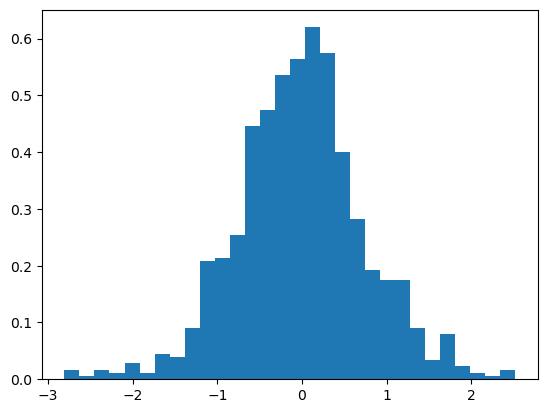

In [14]:
# Generate random samples and do KDE
Gaussian_samples, acceptance_rate = MH_Gaussian_sampler(1000,1) # gamma = 1
plt.hist(Gaussian_samples, bins = 'auto', density = True)
print('Acceptance rate is ' + str(acceptance_rate))

The level of the acceptance rate is not very far away from 15%-40%, the reasonable level.

In general, MH algorithm needs tuning. The tuning part shall focus on selecting the reasonable proposal distribution family and selecting a nice parameter for the proposal distribution.

Here, the Gaussian distribution has an exponentially decaying tail but the tail of Cauchy decays at rate $x^{-2}$ for large enough $x$. The proposal density has a much heavier tail than the density we want to sample from, which is fine in MH. Conversely, if the proposal density has a much lighter tail than the density we want to sample from (e.g. sample Cauchy with Gaussian proposal), there will be problems. One can try to code in practice to see this point.

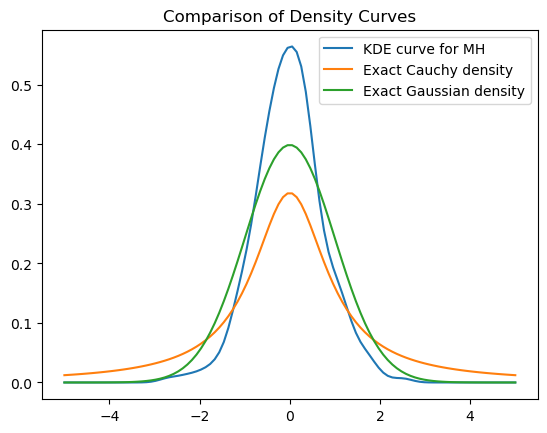

In [15]:
# Verify by KDE
# KDE
Gaussian_samples = Gaussian_samples.reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Gaussian_samples)

# Plot the KDE result
plot_x = np.linspace(-5,5,100) # x-axis in plotting
kde_input = plot_x.reshape(-1,1) # Don't forget to change dimension to 2
plot_x_log_likelihood = kde.score_samples(kde_input) # This is log-likelihood values (refer to document for details)
plot_x_likelihood = np.exp(plot_x_log_likelihood) # Exponentialize to get likelihood
plt.plot(plot_x,plot_x_likelihood) # Plot density curve
plt.title('Comparison of Density Curves')

# Plot the true standard Cauchy density in the same plot
plot_x_true_density = scipy.stats.cauchy.pdf(plot_x)
plt.plot(plot_x,plot_x_true_density)

# Plot the standard Gaussian density in the same plot to see the difference
plot_x_normal_density = scipy.stats.norm.pdf(plot_x)
plt.plot(plot_x,plot_x_normal_density)

# We can add legend to specify curves
plt.legend(['KDE curve for MH','Exact Cauchy density','Exact Gaussian density'])

The density curve shows the right tail behavior (the most important part) but it does not behave very well in the middle. Let's change the value of $\gamma$ to see how the density curve would change.

Acceptance rate is 0.295


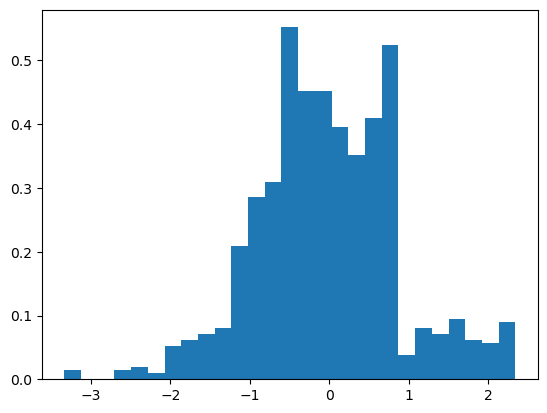

In [16]:
Gaussian_samples, acceptance_rate = MH_Gaussian_sampler(1000,3) # gamma = 3
plt.hist(Gaussian_samples, bins = 'auto', density = True)
print('Acceptance rate is ' + str(acceptance_rate))

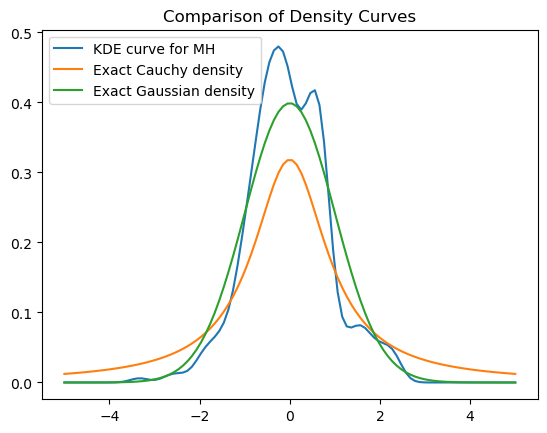

In [17]:
# Verify by KDE
# KDE
Gaussian_samples = Gaussian_samples.reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(Gaussian_samples)

# Plot the KDE result
plot_x = np.linspace(-5,5,100) # x-axis in plotting
kde_input = plot_x.reshape(-1,1) # Don't forget to change dimension to 2
plot_x_log_likelihood = kde.score_samples(kde_input) # This is log-likelihood values (refer to document for details)
plot_x_likelihood = np.exp(plot_x_log_likelihood) # Exponentialize to get likelihood
plt.plot(plot_x,plot_x_likelihood) # Plot density curve
plt.title('Comparison of Density Curves')

# Plot the standard Cauchy density in the same plot
plot_x_cauchy_density = scipy.stats.cauchy.pdf(plot_x)
plt.plot(plot_x,plot_x_cauchy_density)

# Plot the standard Gaussian density in the same plot to see the difference
plot_x_normal_density = scipy.stats.norm.pdf(plot_x)
plt.plot(plot_x,plot_x_normal_density)

# We can add legend to specify curves
plt.legend(['KDE curve for MH','Exact Cauchy density','Exact Gaussian density'])

By fine tuning, $\gamma = 3$ seems to be a fine hyperparameter.

## A Bayesian Example

The example above shows how MH is working but sampling from Gaussian is not a difficult task since the value of inverse standard Gaussian CDF has been calculated at each point and stored for future use. Besides, we also have Box-Muller transformation that enables us to sample Gaussian distributed random samples.

However, in the following Bayesian example, MH is the easiest way to perform sampling. Consider $X_1,...,X_n\sim N(\theta,1)$ with a prior distribution as Cauchy $\pi(\theta) = \frac{1}{\pi(1+\theta^2)}$, we want to know the posterior mean as an estimator for $\theta$.

By Bayes theorem, 
$$\pi(\theta|x_1,...,x_n)\propto \pi(\theta)p(x_1,...,x_n|\theta) \propto \frac{1}{1+\theta^2}e^{-\frac{1}{2}\sum_{i=1}^n(x_i-\theta)^2} \propto \frac{1}{1+\theta^2}e^{-\frac{n}{2}(\overline{x}-\theta)^2}$$
However, $\int_{\mathbb{R}}\frac{1}{1+\theta^2}e^{-\frac{n}{2}(\overline{x}-\theta)^2}\,d\theta$ does not have closed-form solution so we cannot know the exact posterior density function. In order to calculate the posteior mean in the traditional way, we have to first numerically compute $\int_{\mathbb{R}}\frac{1}{1+\theta^2}e^{-\frac{n}{2}(\overline{x}-\theta)^2}\,d\theta$ then numerically compute $\mathbb{E}(\theta|x_1,...,x_n) = \int_{\mathbb{R}}\theta\cdot \pi(\theta|x_1,...,x_n)\,d\theta$.

Let's assume that here we have $n=20$ samples and $\overline{x} = 0.0675$, then the exact value is $\mathbb{E}(\theta|x_1,...,x_n) = 0.062$ (calculated through numerical integration). We try to recover this posterior mean with MH algorithm to show its power. We take the proposal as the Cauchy distribution centered at $x$ (same as above), with $h(x) = \frac{1}{1+x^2}e^{-\frac{20}{2}(0.0675-x)^2}$ the rejection ratio as
$$r = \min\left\{\frac{h(y)}{h(x)},1\right\}$$

In [18]:
def func_h(x):
    return 1 / (1 + x ** 2) * np.exp(-10 * (0.0675 - x) ** 2)

In [19]:
# Posterior sampler based on Metropolis Hastings
def MH_posterior_sampler(size,gamma):
    # Random samples generated
    post_samples = list()
    
    # Initial state
    X = 0.0
    
    # Burn-in period length
    burn_in_time = 1000
    overall_time = burn_in_time + size
    
    # Record acceptance
    num_acc = 0
    
    # Generate proposals once and for all
    proposal = gamma * inv_CDF_Cauchy(overall_time) + X
    
    for time_ind in range(overall_time):
        # Generate proposal
        Y = proposal[time_ind]
        
        # Calculate r
        r = np.minimum(func_h(Y) / func_h(X),1)
                       
        # Accept / reject
        unif_r = np.random.rand(1)
        if unif_r < r:
            X = Y
            num_acc = num_acc + 1
        else:
            X = X
        
        # If counted as generated sample
        if time_ind >= burn_in_time:
            post_samples.append(X)
            
    # Cast as nparray
    post_samples = np.array(post_samples)
    acceptance_rate = num_acc / overall_time
    
    return post_samples, acceptance_rate

In [20]:
# Sample from posterior
size = 1000000
post_samples, acceptance_rate = MH_posterior_sampler(size,1.5) # Choose gamma such that the acceptance rate is reasonable
print(acceptance_rate)

0.14003496503496504


In [21]:
# Monte Carlo to approximate the expectation
print('Approximated posterior mean is ' + str(np.mean(post_samples)))

Approximated posterior mean is 0.059788704628669184


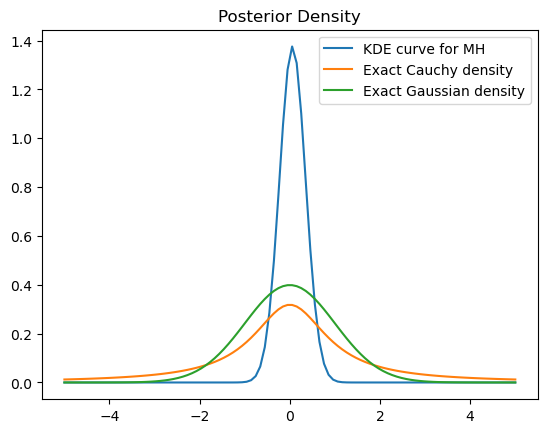

In [22]:
# KDE
post_samples = post_samples.reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(post_samples)

# Plot the KDE result
plot_x = np.linspace(-5,5,100) # x-axis in plotting
kde_input = plot_x.reshape(-1,1) # Don't forget to change dimension to 2
plot_x_log_likelihood = kde.score_samples(kde_input) # This is log-likelihood values (refer to document for details)
plot_x_likelihood = np.exp(plot_x_log_likelihood) # Exponentialize to get likelihood
plt.plot(plot_x,plot_x_likelihood) # Plot density curve
plt.title('Posterior Density')

# Plot the standard Cauchy density in the same plot
plot_x_cauchy_density = scipy.stats.cauchy.pdf(plot_x)
plt.plot(plot_x,plot_x_cauchy_density)

# Plot the standard Gaussian density in the same plot to see the difference
plot_x_normal_density = scipy.stats.norm.pdf(plot_x)
plt.plot(plot_x,plot_x_normal_density)

# We can add legend to specify curves
plt.legend(['KDE curve for MH','Exact Cauchy density','Exact Gaussian density'])

The approximated posterior mean is quite a good estimate and we can directly plot the posterior density curve.

## Exercise

This is a true interview question my friend has asked me in the past. I decided to put it here since it's very much related to the materials introduced above. There are in all 3 questions of a similar form, the difficulty is from easy to hard.

1. We have a black box that can generate $i.i.d.$ random numbers from the distribution $B(1,\frac{1}{2})$. Without other source of randomness, how can we use this black box to construct a generator that generates random numbers from the distribution $B(1,\frac{1}{4})$ as efficiently as possible?

Hint: This should be easy, notice that $\frac{1}{4} = (\frac{1}{2})^2$ and use independence.

2. We have a black box that can generate $i.i.d.$ random numbers from the distribution $\mathcal{E}(\lambda)$ with $\lambda$ unknown. Without other source of randomness, how can we use this black box to construct a generator that generates random numbers from the distribution $B(1,\frac{1}{2})$ as efficiently as possible?

Hint: For any $X,Y$ independent following a continuous probability distribution, $\mathbb{P}(X>Y) = \mathbb{P}(Y>X) = \frac{1}{2}$. Actually, we only need a random number generator that samples from any unknown continuous distribution.

3. We have a black box that can generate $i.i.d.$ random numbers from the distribution $B(1,\frac{1}{4})$. Without other source of randomness, how can we use this black box to construct a generator that generates random numbers from the distribution $B(1,\frac{1}{2})$ as efficiently as possible?

Hint: Now generating two samples and compare their value does not work any longer because of the existence of point mass. On the other hand, using limit theorems is possible but requires a large sample and generating one random number with a large sample is definitely inefficient. One would have to think about the MCMC idea we have mentioned above. Is it possible to construct some Markov chain such that $B(1,\frac{1}{2})$ is its stationary distribution?

Solution:
Consider Markov chain $\left\{X_n\right\}$ with state space $S = \left\{0,1\right\}$. It starts from $X_0 = 0$ and has transition matrix $P = \begin{bmatrix}\frac{1}{4} & \frac{3}{4}\\ \frac{3}{4} & \frac{1}{4}\end{bmatrix}$. It's clear that the stationary distribution is $B(1,\frac{1}{2})$. This Markov chain is ergodic so it converges to the stationary distribution (actually exponentially fast).

Notice that simulating this Markov chain is possible since the transition probability is $\frac{1}{4},\frac{3}{4}$, perfectly matches the distribution $B(1,\frac{1}{4})$.

One will have to simulate the Markov chain for some iterations (burn-in period of MH) and then output the value of Markov chain as random samples from $B(1,\frac{1}{2})$. By doing this, except one occurence of possibly long burn-in period (actually it's short in time since the convergence happens exponentially fast), one random sample generation from $B(1,\frac{1}{2})$ only costs one calculation, which is the transition of the Markov chain.

It's easy to see that this method can be generalized, and can even work if we have a random number generator for unknown discrete probability distribution.